# LSTM과 GRU
- RNN의 한계를 보완하기 위해 장기 의존성을 효과적으로 학습할 수 있는 구조인 LSTM과 GRU가 개발
- 이들은 RNN과 유사하지만, 각기 다른 게이트를 사용하여 필요한 정보만을 선택적으로 전달함으로써 기울기 소실 문제를 완화

# LSTM(Long Short Term Memory)
- 순환 신경망(RNN)의 한 종류로, RNN의 한계인 기울기 소실(Vanishing Gradient) 문제를 해결하기 위해 개발된 모델
- LSTM은 셀 상태(cell state)와 게이트(gate)라는 독특한 구조를 통해 오래된 정보와 새로운 정보 간의 균형을 유지하면서 학습


## LSTM 개발된 이유
- 순환 신경망(RNN)은 순차적 데이터를 다루는 데 유용하지만, 긴 시퀀스를 학습할 때 이전 정보가 사라지는 기울기 소실 문제가 발생할 수 있음
- LSTM은 이러한 기울기 소실 문제를 해결하기 위해 개발되었으며, 장기 의존성(long-term dependency)을 기억하고 활용할 수 있음

## LSTM의 아이디어
- LSTM은 RNN에 셀 상태(cell state)와 게이트(gate)라는 구조를 추가하여 중요한 정보를 오래 유지하고, 불필요한 정보는 삭제하는 방식으로 문제를 해결
- LSTM의 핵심은 정보의 흐름을 조절하는 게이트인데, 각 게이트는 정보의 비중을 조절하여, 필요할 때는 기억하고, 불필요할 때는 잊는 방식으로 정보 손실을 줄임

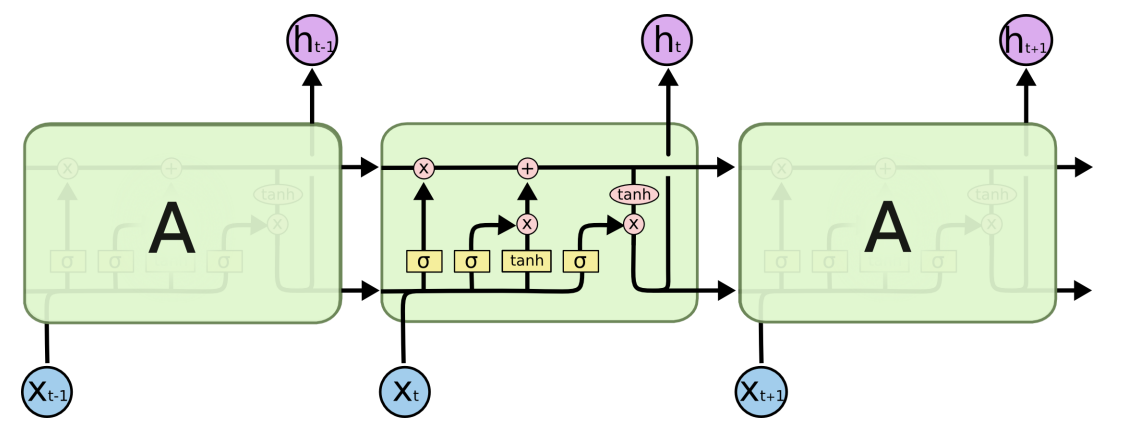

## LSTM의 구조와 작동 방식
- LSTM은 기본적으로 셀 상태(cell state)와 3개의 게이트로 구성
- 각 게이트는 LSTM의 기억과 망각 과정을 제어

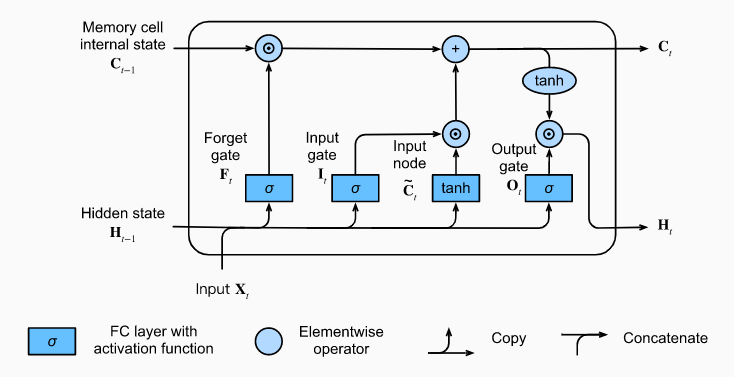

### 셀 상태(Cell State)
- 셀 상태는 LSTM 셀이 시간에 따라 정보를 전달하는 기억의 흐름
- 셀 상태는 긴 시퀀스에서도 정보가 사라지지 않도록 수정을 가하며, 게이트에 의해 정보의 유지 및 삭제가 결정
- 셀 상태는 게이트의 작용으로 새로운 정보가 추가되거나 이전 정보를 잊으면서도, 전체 흐름을 유지

### 망각 게이트(Forget Gate)
- 이전 셀 상태에서 얼마나 많은 정보를 삭제할지를 결정

$$
\begin{split}\begin{aligned}
\mathbf{F}_t &= \sigma(\mathbf{X}_t \mathbf{W}_{xf} + \mathbf{H}_{t-1} \mathbf{W}_{hf} + \mathbf{b}_f)
\end{aligned}\end{split}
$$



### 입력 게이트(Input Gate)
- 새로운 정보를 셀 상태에 얼마나 반영할지를 결정
$$
\begin{split}\begin{aligned}
\mathbf{I}_t &= \sigma(\mathbf{X}_t \mathbf{W}_{xi} + \mathbf{H}_{t-1} \mathbf{W}_{hi} + \mathbf{b}_i)
\end{aligned}\end{split}
$$
$$
\tilde{\mathbf{C}}_t = \text{tanh}(\mathbf{X}_t \mathbf{W}_{xc} + \mathbf{H}_{t-1} \mathbf{W}_{hc} + \mathbf{b}_c)
$$


### 출력 게이트(Output Gate)
- 현재 은닉 상태로 어떤 정보를 내보낼지를 결정
$$
\begin{split}\begin{aligned}
\mathbf{O}_t &= \sigma(\mathbf{X}_t \mathbf{W}_{xo} + \mathbf{H}_{t-1} \mathbf{W}_{ho} + \mathbf{b}_o)
\end{aligned}\end{split}
$$


# GRU(Gated Recurrent Unit)
- LSTM을 간소화
- LSTM과 비슷하게 기울기 소실(Vanishing Gradient) 문제를 해결하면서도 구조가 간단하다는 특징이 있음
- GRU는 LSTM보다 연산량이 줄고, 학습이 효율적임


## GRU 개발된 이유
- LSTM은 RNN의 기울기 소실 문제를 해결하지만, 여러 게이트와 셀 상태(cell state)로 인해 계산량이 많음
- GRU는 LSTM의 성능을 유지하면서 구조를 간단하게 만들기 위해 설계
- 간소화된 구조는 더 적은 계산을 요구하며, 학습을 더 빠르게 할 수 있게 해줌
- 특히 텍스트 생성이나 시계열 데이터 같은 긴 시퀀스를 다룰 때, GRU는 성능 저하 없이 LSTM보다 효율적으로 학습할 수 있음

## GRU의 구조와 작동 방식
- GRU는 셀 상태를 따로 두지 않고 은닉 상태 하나로만 순환 구조를 유지하며, 정보의 흐름을 단순하게 관리

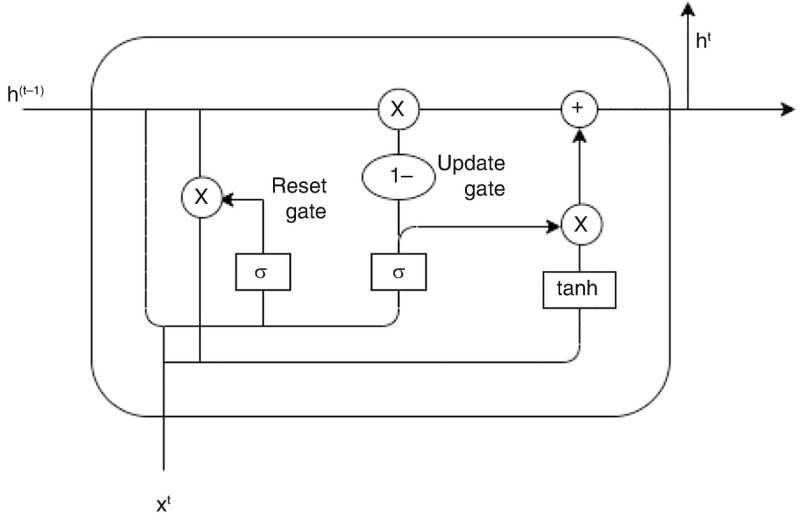

### 리셋 게이트(Reset Gate)
- 이전 은닉 상태에서 얼마나 많은 정보를 잊을지 결정
- 현재 입력이 새롭게 중요한 정보를 담고 있다면, 리셋 게이트는 이전 은닉 상태를 낮추어 새로운 정보의 반영을 용이하게 함

### 업데이트 게이트(Update Gate)
- GRU의 핵심으로, 현재 시점의 정보가 은닉 상태에 얼마나 반영될지를 조절

In [1]:
import torch
import numpy as np
import pandas as pd
from tqdm.auto import tqdm
import random
import os

SEED = 42
def reset_seeds(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True

In [2]:
import pandas_datareader.data as web

df = web.DataReader('005930', 'naver', start='2023-01-01', end='2023-12-31')
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2023-01-02,55500,56100,55200,55500,10031448
2023-01-03,55400,56000,54500,55400,13547030
2023-01-04,55700,58000,55600,57800,20188071
2023-01-05,58200,58800,57600,58200,15682826
2023-01-06,58300,59400,57900,59000,17334989


In [3]:
df = df.astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 245 entries, 2023-01-02 to 2023-12-28
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Open    245 non-null    int64
 1   High    245 non-null    int64
 2   Low     245 non-null    int64
 3   Close   245 non-null    int64
 4   Volume  245 non-null    int64
dtypes: int64(5)
memory usage: 11.5 KB


In [4]:
data = df.to_numpy()
data

array([[   55500,    56100,    55200,    55500, 10031448],
       [   55400,    56000,    54500,    55400, 13547030],
       [   55700,    58000,    55600,    57800, 20188071],
       ...,
       [   76100,    76700,    75700,    76600, 13164909],
       [   76700,    78000,    76500,    78000, 20651042],
       [   77700,    78500,    77500,    78500, 17797536]])

In [5]:
mins = data.min(axis=0)
sizes = data.max(axis=0) - data.min(axis=0)

(data - mins) / sizes

array([[0.0044843 , 0.00444444, 0.03043478, 0.004329  , 0.17389595],
       [0.        , 0.        , 0.        , 0.        , 0.31921842],
       [0.01345291, 0.08888889, 0.04782609, 0.1038961 , 0.59373696],
       ...,
       [0.92825112, 0.92      , 0.92173913, 0.91774892, 0.3034228 ],
       [0.95515695, 0.97777778, 0.95652174, 0.97835498, 0.61287465],
       [1.        , 1.        , 1.        , 1.        , 0.4949202 ]])

In [6]:
def transform_data(data, mins, sizes, seq_len=10, pred_len=5):
    data = (data - mins) / sizes
    x_list = []
    y_list = []

    for i in range(seq_len, len(data) + 1 - pred_len):
        x = data[i-seq_len:i]
        y = data[i:i+pred_len, 3]
        x_list.append(x)
        y_list.append(y)

    x_arr = np.array(x_list)
    y_arr = np.array(y_list)

    return x_arr, y_arr

In [7]:
x_arr, y_arr = transform_data(data, mins, sizes)
x_arr.shape, y_arr.shape

((231, 10, 5), (231, 5))

In [8]:
class FinanceDataset(torch.utils.data.Dataset):
    def __init__(self, x, y=None):
        self.x = x
        self.y = y

    def __len__(self):
        return len(self.x)

    def __getitem__(self, idx):
        item = {}
        item["x"] = torch.Tensor(self.x[idx])
        if self.y is not None:
            item["y"] = torch.Tensor(self.y[idx])
        return item

In [9]:
dataset = FinanceDataset(x_arr, y_arr)
len(dataset), dataset[0]

(231,
 {'x': tensor([[0.0045, 0.0044, 0.0304, 0.0043, 0.1739],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.3192],
          [0.0135, 0.0889, 0.0478, 0.1039, 0.5937],
          [0.1256, 0.1244, 0.1348, 0.1212, 0.4075],
          [0.1300, 0.1511, 0.1478, 0.1558, 0.4758],
          [0.1928, 0.2089, 0.2217, 0.2294, 0.5297],
          [0.2152, 0.2267, 0.2348, 0.2165, 0.3735],
          [0.2511, 0.2311, 0.2522, 0.2208, 0.2681],
          [0.2556, 0.2311, 0.2348, 0.2208, 0.4249],
          [0.2287, 0.2311, 0.2565, 0.2338, 0.2764]]),
  'y': tensor([0.2468, 0.2424, 0.2165, 0.2641, 0.2771])})

In [10]:
dataloader = torch.utils.data.DataLoader(dataset, batch_size=1, shuffle=False)
batch = next(iter(dataloader))
batch

{'x': tensor([[[0.0045, 0.0044, 0.0304, 0.0043, 0.1739],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.3192],
          [0.0135, 0.0889, 0.0478, 0.1039, 0.5937],
          [0.1256, 0.1244, 0.1348, 0.1212, 0.4075],
          [0.1300, 0.1511, 0.1478, 0.1558, 0.4758],
          [0.1928, 0.2089, 0.2217, 0.2294, 0.5297],
          [0.2152, 0.2267, 0.2348, 0.2165, 0.3735],
          [0.2511, 0.2311, 0.2522, 0.2208, 0.2681],
          [0.2556, 0.2311, 0.2348, 0.2208, 0.4249],
          [0.2287, 0.2311, 0.2565, 0.2338, 0.2764]]]),
 'y': tensor([[0.2468, 0.2424, 0.2165, 0.2641, 0.2771]])}

In [11]:
batch['x'].shape

torch.Size([1, 10, 5])

# LSTM Layer
- input_size: 입력 데이터의 피처의 수
- hidden_size: hidden state의 출력 피처의 수
- num_layers: RNN layer의 수(기본값 1)
- batch_first: 입력데이터의 batch 차원 첫번째 여부(기본값 False)
    - `True`: (batch, seq, feature)
    - `False`: (seq, batch, feature)
- bidirectional: 양방향 여부(기본값 False)

In [12]:
reset_seeds(SEED)
lstm_layer = torch.nn.LSTM(x_arr.shape[2], 16, batch_first=True)
output, (hn, cn) = lstm_layer(batch["x"])
print(output.shape) # batch, seq, feature
print(hn.shape) # nlayer, batch, feature
print(cn.shape) # nlayer, batch, feature

torch.Size([1, 10, 16])
torch.Size([1, 1, 16])
torch.Size([1, 1, 16])


In [13]:
output[:, -1]

tensor([[ 0.1014, -0.0274,  0.0516, -0.0582,  0.0056, -0.1212,  0.1720, -0.0478,
         -0.0135, -0.1039, -0.0913, -0.0600,  0.0283, -0.0171,  0.0297, -0.1611]],
       grad_fn=<SelectBackward0>)

In [14]:
hn[-1]

tensor([[ 0.1014, -0.0274,  0.0516, -0.0582,  0.0056, -0.1212,  0.1720, -0.0478,
         -0.0135, -0.1039, -0.0913, -0.0600,  0.0283, -0.0171,  0.0297, -0.1611]],
       grad_fn=<SelectBackward0>)

In [15]:
reset_seeds(SEED)
lstm_layer = torch.nn.LSTM(x_arr.shape[2], 16, batch_first=True, num_layers=2)
output, (hn, cn) = lstm_layer(batch["x"])
print(output.shape) # batch, seq, feature
print(hn.shape) # nlayer, batch, feature
print(cn.shape) # nlayer, batch, feature

torch.Size([1, 10, 16])
torch.Size([2, 1, 16])
torch.Size([2, 1, 16])


In [16]:
hn[-1].shape

torch.Size([1, 16])

In [17]:
reset_seeds(SEED)
lstm_layer = torch.nn.LSTM(x_arr.shape[2], 16, batch_first=True, bidirectional=True)
output, (hn, cn) = lstm_layer(batch["x"])
print(output.shape) # batch, seq, feature
print(hn.shape) # nlayer, batch, feature
print(cn.shape) # nlayer, batch, feature

torch.Size([1, 10, 32])
torch.Size([2, 1, 16])
torch.Size([2, 1, 16])


In [18]:
hn.permute(1, 0, 2).flatten(1).shape

torch.Size([1, 32])

# GRU Layer

In [19]:
gru_layer = torch.nn.GRU(x_arr.shape[2], 16, batch_first=True)
output, hn = gru_layer(batch["x"])
print(output.shape)
print(hn.shape)

torch.Size([1, 10, 16])
torch.Size([1, 1, 16])


In [20]:
gru_layer = torch.nn.GRU(x_arr.shape[2], 16, batch_first=True, num_layers=6, bidirectional=True)
output, hn = gru_layer(batch["x"])
print(output.shape)
print(hn.shape)

torch.Size([1, 10, 32])
torch.Size([12, 1, 16])


In [21]:
hn.permute(1, 0, 2).flatten(1).shape

torch.Size([1, 192])

In [22]:
hn[-2:].permute(1, 0, 2).flatten(1).shape

torch.Size([1, 32])

# 모델 클래스

- RNN 계열(LSTM, GRU) 레이어 출력 텐서들의 shape의 각 차원 의미를 확실히 숙지
- 모델 클래스 다양하게 만들어 보기
    - 양방향 옵션, 레이어 개수
    - 모든 셀의 히든 출력을 batch, seq, feature -> batch, seq * feature 변경해서 FC 레이어에 전달해보기

In [32]:
class Net(torch.nn.Module):
    def __init__(self, n_features, hidden_size, pred_len):
        super().__init__()
        self.lstm_layer = torch.nn.LSTM(n_features, hidden_size, batch_first=True)
        self.seq = torch.nn.Sequential(
            torch.nn.Linear(hidden_size, hidden_size // 2),
            torch.nn.LayerNorm(hidden_size // 2),
            torch.nn.LeakyReLU(),
            torch.nn.Linear(hidden_size // 2, pred_len)
        )

    def forward(self, x):
        output, (hn, cn) = self.lstm_layer(x)
        # nlayer, batch, feature -> batch, feature
        return self.seq(hn[-1])

In [ ]:
# 양방향
class Net(torch.nn.Module):
    def __init__(self, n_features, hidden_size, pred_len):
        super().__init__()
        self.lstm_layer = torch.nn.LSTM(n_features, hidden_size, batch_first=True, bidirectional=True)
        self.seq = torch.nn.Sequential(
            torch.nn.Linear(hidden_size * 2, hidden_size // 2),
            torch.nn.LayerNorm(hidden_size // 2),
            torch.nn.LeakyReLU(),
            torch.nn.Linear(hidden_size // 2, pred_len)
        )

    def forward(self, x):
        output, (hn, cn) = self.lstm_layer(x)
        # nlayer, batch, feature -> batch, feature
        return self.seq(torch.cat((hn[-2], hn[-1]), dim=1))

In [39]:
# 레이어 개수 변경
class Net(torch.nn.Module):
    def __init__(self, n_features, hidden_size, pred_len):
        super().__init__()
        self.lstm_layer = torch.nn.LSTM(n_features, hidden_size, batch_first=True, num_layers=2)
        self.seq = torch.nn.Sequential(
            torch.nn.Linear(hidden_size, hidden_size // 2),
            torch.nn.LayerNorm(hidden_size // 2),
            torch.nn.LeakyReLU(),
            torch.nn.Linear(hidden_size // 2, pred_len)
        )

    def forward(self, x):
        output, (hn, cn) = self.lstm_layer(x)
        # nlayer, batch, feature -> batch, feature
        return self.seq(hn[-1])

In [40]:
model = Net(x_arr.shape[2], 16, y_arr.shape[1])
model(torch.Tensor(x_arr[:2]))

tensor([[ 0.6439, -0.1527, -0.0501,  0.8198,  0.6691],
        [ 0.6440, -0.1525, -0.0505,  0.8195,  0.6689]],
       grad_fn=<AddmmBackward0>)

In [34]:
def train_loop(dataloader, model, loss_fn, optimizer, device):
    model.train() # 학습 모드로 전환
    epoch_loss = 0

    for batch in dataloader: # 배치단위로 데이터 반환
        pred = model(batch["x"].to(device)) # 예측
        loss = loss_fn(pred, batch["y"].to(device)) # 손실 계산

        optimizer.zero_grad() # 이전 경사 누적을 방지하기 위해 0으로 초기화
        loss.backward() # 역전파
        optimizer.step() # 가중치 업데이트

        epoch_loss += loss.item() # 에폭 loss 를 계산하기 위해 배치 loss 합

    epoch_loss /= len(dataloader) # 에폭 loss 구함

    return epoch_loss

In [35]:
@torch.no_grad() # with 문과 같은 역할
def test_loop(dataloader, model, loss_fn, device):
    model.eval() # 평가 모드
    epoch_loss = 0
    pred_list = []

    for batch in dataloader:
        pred = model(batch["x"].to(device))
        if batch.get("y") is not None: # y 키에 텐서가 있을 경우만 loss 계산
            loss = loss_fn(pred, batch["y"].to(device))
            epoch_loss += loss.item()

        pred = pred.to("cpu").numpy()
        pred_list.append(pred)

    epoch_loss /= len(dataloader)
    pred = np.concatenate(pred_list)
    return epoch_loss, pred

In [36]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import KFold

n_splits = 5 # K-fold k 값
n_features = x_arr.shape[2] # 입력 데이터의 피처 수
hidden_size = 16 # RNN 레이어의 출력 피처 개수
pred_len = y_arr.shape[1] # 예측 길이(output layer 노드 수)
batch_size = 32
epochs = 1000
cv = KFold(n_splits=n_splits, shuffle=True, random_state=SEED)
device = "cuda" if torch.cuda.is_available() else "cpu"
loss_function = torch.nn.MSELoss()

In [37]:
is_holdout = False
reset_seeds(SEED)
score_list = []

for i, (tri, vai) in enumerate(cv.split(x_arr)):
    # 학습데이터
    train_dataset = FinanceDataset(x_arr[tri], y_arr[tri])
    train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

    # 검증데이터
    valid_dataset = FinanceDataset(x_arr[vai], y_arr[vai])
    valid_dataloader = torch.utils.data.DataLoader(valid_dataset, batch_size=batch_size, shuffle=False)

    model = Net(n_features, hidden_size, pred_len).to(device)
    optimizer = torch.optim.Adam(model.parameters())

    best_score = np.inf
    patience = 0
    for _ in tqdm(range(epochs)):
        train_loss = train_loop(train_dataloader, model, loss_function, optimizer, device)
        valid_loss, pred = test_loop(valid_dataloader, model, loss_function, device)

        pred = pred * sizes[3] + mins[3]
        true = y_arr[vai] * sizes[3] + mins[3]
        score = mean_absolute_error(true, pred)
        patience += 1

        if score < best_score:
            patience = 0
            best_score = score
            torch.save(model.state_dict(), f"model_{i}.pt")

        if patience == 5:
            break

    score_list.append(best_score)
    print(f"Fold {i} MAE: {best_score}")

    if is_holdout:
        break

  0%|          | 0/1000 [00:00<?, ?it/s]

Fold 0 MAE: 1059.2439328457447


  0%|          | 0/1000 [00:00<?, ?it/s]

Fold 1 MAE: 1357.8109375


  0%|          | 0/1000 [00:00<?, ?it/s]

Fold 2 MAE: 1099.2922044836955


  0%|          | 0/1000 [00:00<?, ?it/s]

Fold 3 MAE: 970.7101732336956


  0%|          | 0/1000 [00:00<?, ?it/s]

Fold 4 MAE: 1105.7864979619565


In [38]:
np.mean(score_list)

1118.5687492050183